# Qn 5

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from IPython.display import Image 
import pydotplus

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

### Step 1: Read data, analyze, filll missing values with average and split the data to training and test set

In [2]:
dataset = pd.read_csv('./data/Titanic.csv', index_col=0)

In [3]:
dataset.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
dataset.shape

(1309, 14)

#### It can be observed tht columns survived, sibsp have categorical values.

In [5]:
dataset.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


survived      0.381971
age          29.881135
sibsp         0.498854
parch         0.385027
fare         33.295479
body        160.809917
dtype: float64

In [6]:
# Finding columns having null values
dataset.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
# replacing null values with mean for each column
df_columns = dataset.mean(axis = 0)
dataset.fillna(df_columns, inplace= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [8]:
dataset.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,160.809917,"St Louis, MO"
2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,160.809917,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.000000,"Montreal, PQ / Chesterville, ON"
5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,160.809917,"Montreal, PQ / Chesterville, ON"


In [9]:
dataset.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body            0
home.dest     564
dtype: int64

In [10]:
# as decision tree of scikit class could not accept string values, we need to map the 
# values to integers

In [11]:
pd.unique(dataset['pclass'])

array(['1st', '2nd', '3rd'], dtype=object)

In [12]:
# taking only necessary columns into dataframe df

df = dataset[['pclass', 'sex', 'age', 'sibsp','survived']]

# mapping to integers
df['pclass'] = df.pclass.map({'1st' : 1, 
               '2nd' : 2, 
               '3rd' : 3})

df['sex'] = df.sex.map({'male' : 0,
            'female' : 1})



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [13]:
df.isnull().sum()
# to verify that neither dependent or independent columns are having na values

pclass      0
sex         0
age         0
sibsp       0
survived    0
dtype: int64

In [14]:
df.head(5)

,pclass,sex,age,sibsp,survived
1,1,1,29.0000,0,1
2,1,0,0.9167,1,1
3,1,1,2.0000,1,0
4,1,0,30.0000,1,0
5,1,1,25.0000,1,0


#### Splitting dataset

In [15]:
X = df.iloc[:, :-1]   # dependent variable
y = df.iloc[:, -1]    # independent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

X_train.head(5)

,pclass,sex,age,sibsp
803,3,0,29.881135,0
895,3,0,4.000000,1
663,3,0,40.000000,0
962,3,1,29.881135,1
356,2,1,36.000000,0


In [16]:
y = dataset['survived']
y.head(5)

1    1
2    1
3    0
4    0
5    0
Name: survived, dtype: int64

## b) Fitting decision tree model using indepenent variables - pclass, sex, age, sibsp and dependent variable 'survived'

In [17]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

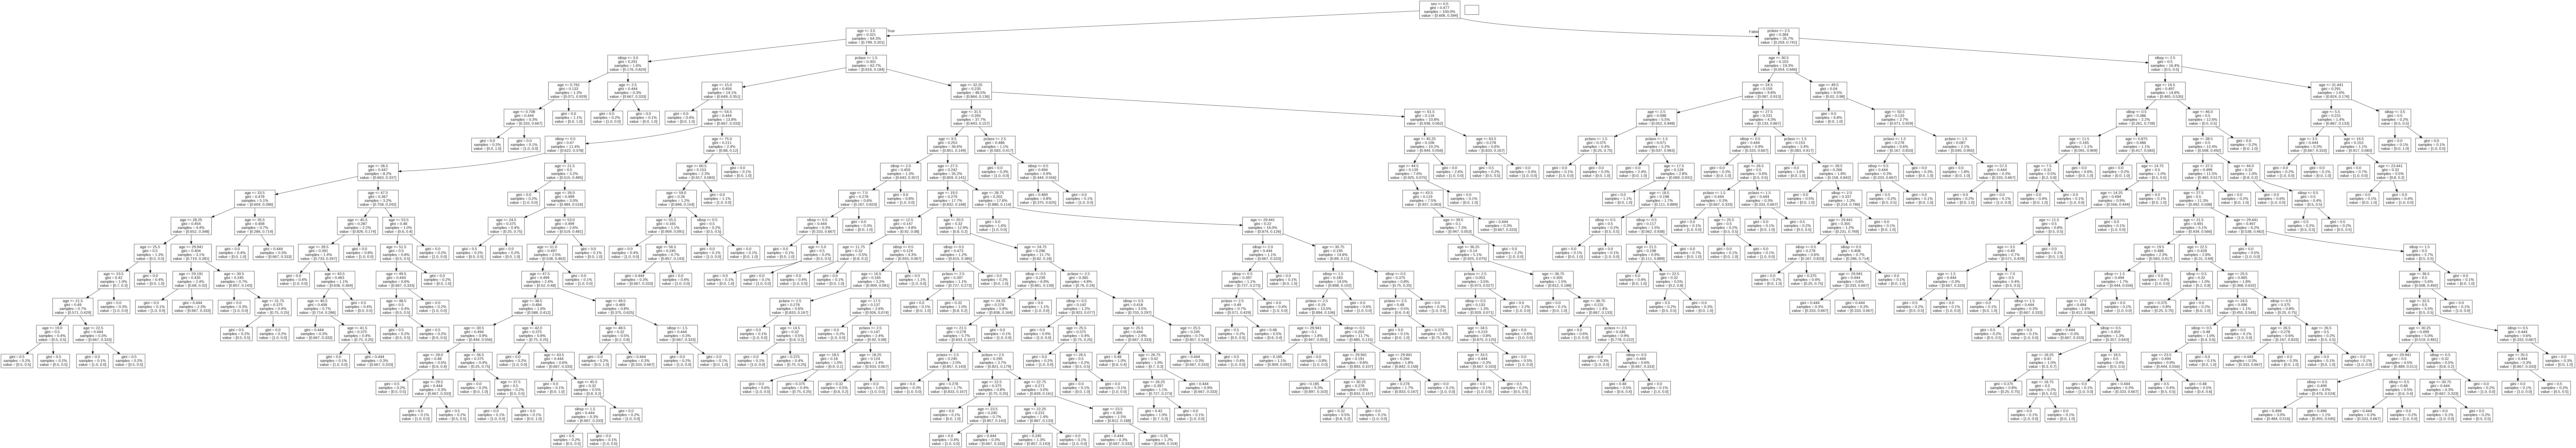

In [18]:
source = export_graphviz(
    tree_clf,
    feature_names= X.columns,
    proportion=0.2
)

pydot_graph = pydotplus.graph_from_dot_data(source)
#pydot_graph.set_size('"5,5!"')
Image(pydot_graph.create_png())

## 3: Find best parameter max_leaf nodes to prune the tree

#### 3.a - finding best parameter max_leaf nodes

In [19]:
params = {'max_leaf_nodes': list(range(2, 20))}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=40), params, cv = 10, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [20]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=8, random_state=40)

It can be seen that the best estmator for hyper paramter 'max_leaf_node' is 8. Hence we will be using the value 8 for training models

#### 3.b Pruning the tree with the hyperparameter 'max_leaf_nodes'

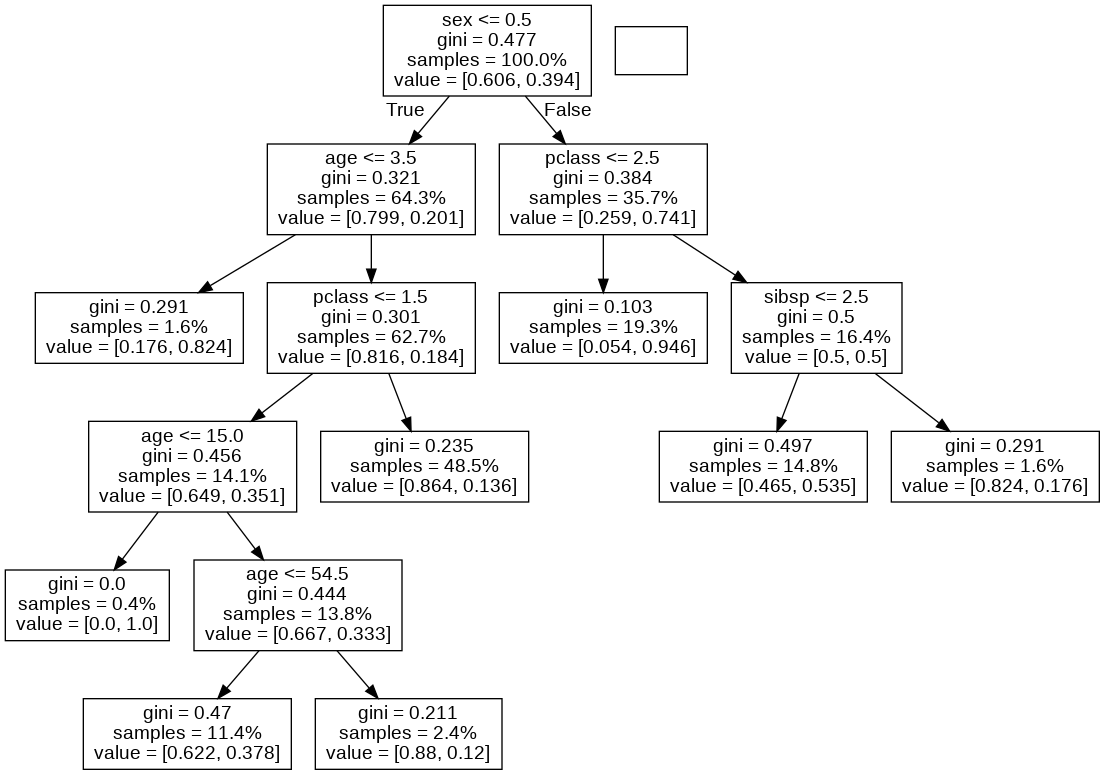

In [21]:
pruned_tree_clf = DecisionTreeClassifier(criterion='gini', random_state=40, max_leaf_nodes=8)
pruned_tree_clf.fit(X_train, y_train)

#Source (export_graphviz(
#    pruned_tree_clf,
#   feature_names= X.columns
#)
#)

source = export_graphviz(
    pruned_tree_clf,
    feature_names= X.columns,
    proportion=0.2
)

pydot_graph = pydotplus.graph_from_dot_data(source)
#pydot_graph.set_size('"5,5!"')
Image(pydot_graph.create_png())

## Part 4 : Accuracy for prediction of percentage of survviors and fatalities

In [22]:
y_pred = pruned_tree_clf.predict(X_test)

In [23]:
accuracy_score(y_pred, y_test, normalize = True)

0.7900763358778626

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[144  30]
 [ 25  63]]


In [25]:
# Survivors and Fatalities are the two classes for our model and hence we can use
# 
True_Fatalities = conf_matrix[0][0] #TN
False_Fatalities = conf_matrix[1][0] #FN
False_Survivors = conf_matrix[0][1] #FP
True_Survivors = conf_matrix[1][1] #TP

accuracy_survivors = True_Survivors / ( True_Survivors + False_Fatalities) * 100
accuracy_fatalities = True_Fatalities / (True_Fatalities + False_Survivors) * 100

print(' Prediction on Test Set after training using Decision Tree')
print('Accuracy of survivors correctly predicted : {:.2f}'.format(accuracy_survivors))
print('Accuracy of fatalities correctly predicted : {:.2f}'.format(accuracy_fatalities))

 Prediction on Test Set after training using Decision Tree
Accuracy of survivors correctly predicted : 71.59
Accuracy of fatalities correctly predicted : 82.76


## Part 5 : RandomForestClassififer() and find accuracy of prediction

In [26]:
forest_clf = RandomForestClassifier(random_state=40, n_estimators= 50, max_leaf_nodes= 8)
# note that for n_estimator, value to be used is given in qn as 50
# for max_leaf_node, value used is 8 which we have found before using GridSearchCV()

forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)

In [27]:
# Confusion Matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
print(conf_matrix_forest)

[[147  27]
 [ 28  60]]


In [28]:
# Survivors and Fatalities are the two classes for our model and hence we can use
# 
True_Fatalities_forest = conf_matrix_forest[0][0] #TN
False_Fatalities_forest = conf_matrix_forest[1][0] #FN
False_Survivors_forest = conf_matrix_forest[0][1] #FP
True_Survivors_forest = conf_matrix_forest[1][1] #TP

accuracy_survivors_for = True_Survivors_forest / ( True_Survivors_forest + False_Fatalities_forest) * 100
accuracy_fatalities_for = True_Fatalities_forest / (True_Fatalities_forest + False_Survivors_forest) * 100

print(' Prediction on Test Set after training using Random Forest Classification')
print('Accuracy of survivors correctly predicted : {:.2f}'.format(accuracy_survivors_for))
print('Accuracy of fatalities correctly predicted : {:.2f}'.format(accuracy_fatalities_for))

 Prediction on Test Set after training using Random Forest Classification
Accuracy of survivors correctly predicted : 68.18
Accuracy of fatalities correctly predicted : 84.48


## Conclusion

* It can be observed that the prediction accuracy for survivors is slightly more in Decision Tree than Random Forest.
* But when coming to prediction accuracy of fatalities, the accuracy is more in Random Forest than in Decision Tree